In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the data from the CSV file
data = pd.read_csv('meteorite_data2.csv')




In [17]:
data.dtypes

Name of Earth Meteorite     object
Meteorite                    int64
nametype                    object
recclass                    object
mass                       float64
year                        object
reclat                     float64
recclong                   float64
point coordinates           object
dtype: object

In [22]:

# Convert 'year' column to datetime format, handle out-of-bounds values
data['year'] = pd.to_datetime(data['year'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')

# Filter out missing or out-of-bounds datetime values
data = data.dropna(subset=['year'])

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = data[data['year'].dt.year < 2000]


In [23]:
earth_meteorites_before_2000

,Name of Earth Meteorite,Meteorite,nametype,recclass,mass,year,reclat,recclong,point coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
995,Tirupati,24009,Valid,H6,230.0,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]"
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500.0,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]"


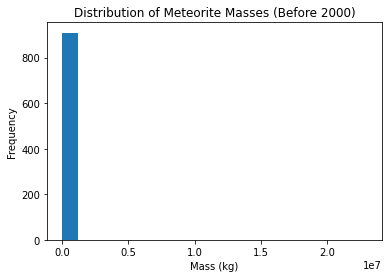

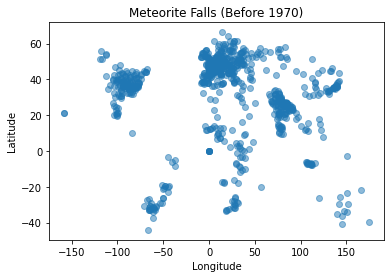

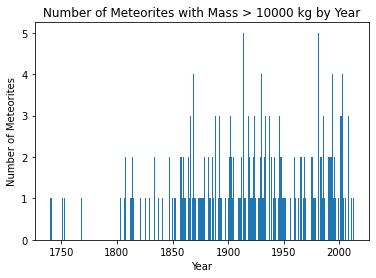

In [24]:
# Plot the distribution of meteorite masses
plt.hist(earth_meteorites_before_2000['mass'], bins=20)
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Meteorite Masses (Before 2000)')
plt.show()

# Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = data[data['year'].dt.year < 1970]

# Plot the locations of meteorite falls on a map
plt.scatter(earth_meteorites_before_1970['recclong'], earth_meteorites_before_1970['reclat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Falls (Before 1970)')
plt.show()

# Get all the Earth meteorites whose mass was more than 10000 kg
earth_meteorites_high_mass = data[data['mass'] > 10000]

# Plot a bar chart showing the number of meteorites with high mass by year
year_counts = earth_meteorites_high_mass['year'].dt.year.value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.title('Number of Meteorites with Mass > 10000 kg by Year')
plt.show()



In [25]:
earth_meteorites_before_1970

,Name of Earth Meteorite,Meteorite,nametype,recclass,mass,year,reclat,recclong,point coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"
5,Adhi Kot,379,Valid,EH4,4239.0,1919-01-01,32.10000,71.80000,"[71.8, 32.1]"
...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
995,Tirupati,24009,Valid,H6,230.0,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]"
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500.0,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]"


In [26]:
earth_meteorites_high_mass

,Name of Earth Meteorite,Meteorite,nametype,recclass,mass,year,reclat,recclong,point coordinates
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
7,Agen,392,Valid,H5,30000.0,1814-01-01,44.21667,0.61667,"[0.61667, 44.21667]"
11,Aïr,424,Valid,L6,24000.0,1925-01-01,19.08333,8.38333,"[8.38333, 19.08333]"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,1981-01-01,39.91667,42.81667,"[42.81667, 39.91667]"
27,Alfianello,466,Valid,L6,228000.0,1883-01-01,45.26667,10.15000,"[10.15, 45.26667]"
...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,1878-01-01,49.60000,17.11667,"[17.11667, 49.6]"
992,Tilden,23998,Valid,L6,74800.0,1927-01-01,38.20000,-89.68333,"[-89.68333, 38.2]"
994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
